In [ ]:
#This is a fork of josephlee94's original work at https://github.com/josephlee94/intuitive-deep-learning/

#This was an assigned python coursework to learn / understand / test deep learning using python.

#Jerla Gerald

In [2]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
print('x_train shape:', x_train.shape)

x_train shape: (50000, 32, 32, 3)


The label is: [6]
The label is: [9]


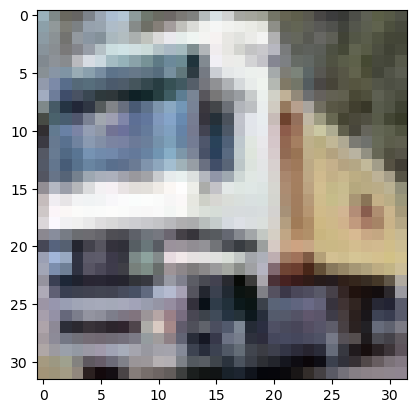

In [5]:
import matplotlib.pyplot as plt
#%matplotlib inline
img = plt.imshow(x_train[0])

print('The label is:', y_train[0])
img = plt.imshow(x_train[1])
print('The label is:', y_train[1])


In [7]:
import keras
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

print('The one hot label is:', y_train_one_hot[1])


The one hot label is: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255


from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)))

model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))


model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))

model.add(Dropout(0.5))


model.add(Dense(10, activation='softmax'))


model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


hist = model.fit(x_train, y_train_one_hot, 
           batch_size=32, epochs=20, 
           validation_split=0.2)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

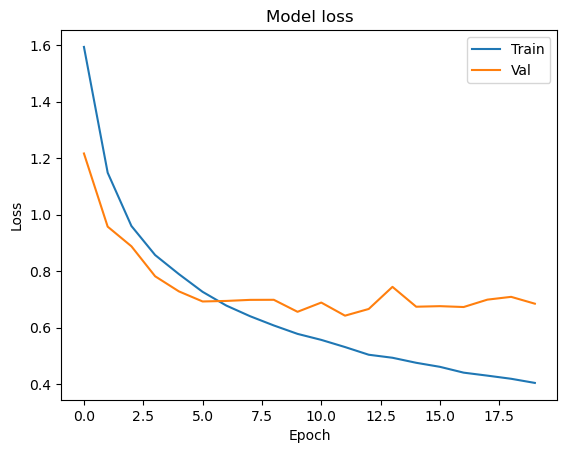

In [21]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

# plt.plot(hist.history['acc'])
# plt.plot(hist.history['val_acc'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Val'], loc='lower right')
# plt.show()


# model.evaluate(x_test, y_test_one_hot)[1]


# model.save('my_cifar10_model.h5')


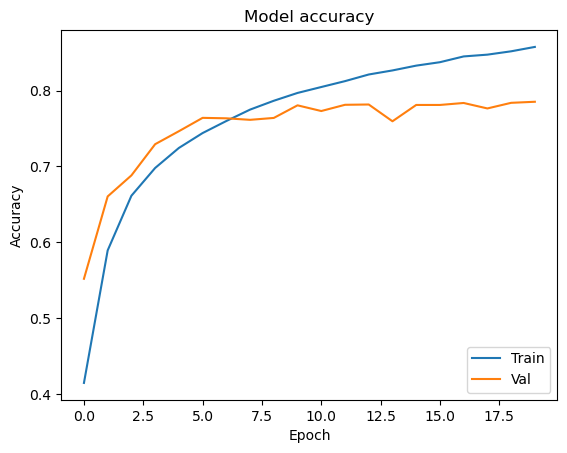

In [23]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


In [25]:
model.evaluate(x_test, y_test_one_hot)

313/313 [==============================] - 6s 18ms/step - loss: 0.7155 - accuracy: 0.7763


[0.7154532074928284, 0.7763000130653381]

In [27]:
model.save('jerla_cifar10_model.h5')

In [30]:
my_image = plt.imread("cat.jpg")

In [32]:
from skimage.transform import resize
my_image_resized = resize(my_image, (32,32,3))

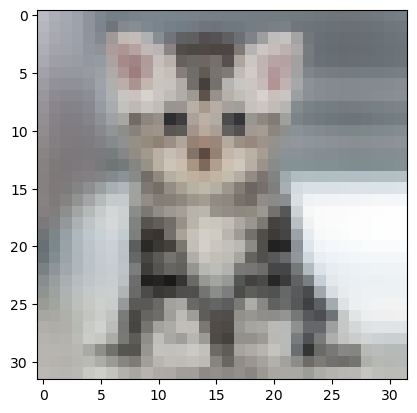

In [34]:
img = plt.imshow(my_image_resized)

In [36]:
import numpy as np
probabilities = model.predict(np.array( [my_image_resized,] ))

1/1 [==============================] - 0s 31ms/step


In [38]:
probabilities

array([[5.9873299e-05, 1.9057097e-06, 3.8825262e-02, 2.7284077e-01,
        1.6145652e-02, 6.3373268e-01, 3.2481074e-03, 3.3927333e-02,
        1.2151182e-03, 3.2694090e-06]], dtype=float32)

In [41]:
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities[0,:])

print("Most likely class:", number_to_class[index[9]], "-- Probability:", probabilities[0,index[9]])
print("Second most likely class:", number_to_class[index[8]], "-- Probability:", probabilities[0,index[8]])
print("Third most likely class:", number_to_class[index[7]], "-- Probability:", probabilities[0,index[7]])
print("Fourth most likely class:", number_to_class[index[6]], "-- Probability:", probabilities[0,index[6]])
print("Fifth most likely class:", number_to_class[index[5]], "-- Probability:", probabilities[0,index[5]])


Most likely class: dog -- Probability: 0.6337327
Second most likely class: cat -- Probability: 0.27284077
Third most likely class: bird -- Probability: 0.038825262
Fourth most likely class: horse -- Probability: 0.033927333
Fifth most likely class: deer -- Probability: 0.016145652
